In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [22]:
from matplotlib import pyplot
import seaborn as sns

In [2]:
dfall = pd.read_csv('builtinnyc_data.csv', thousands=',')

In [3]:
dfall.shape

(4991, 11)

In [4]:
dfall.i_name.unique()

array(['Brigit', 'Zearn', 'MaestroQA', ..., 'NuWare', 'Splash Payments',
       'Tend'], dtype=object)

In [94]:
dfall['date'].value_counts()

2014.0    377
2015.0    311
2012.0    296
2013.0    294
2016.0    248
         ... 
1957.0      1
1960.0      1
1929.0      1
1917.0      1
1968.0      1
Name: date, Length: 62, dtype: int64

In [95]:
dfall['job_type'].value_counts()

Software                             272
Fintech                              268
Healthtech                           202
AdTech                               168
Edtech                               142
                                    ... 
Machine Learning + Marketing Tech      1
Computer Vision + eCommerce            1
Software + Food                        1
eCommerce + Internet of Things         1
Wearables + Internet of Things         1
Name: job_type, Length: 565, dtype: int64

In [97]:
dfall.isna().sum()

address        1362
company           0
date           1908
description     422
funding        4545
i_name           10
job_type        204
jobs           4752
loc_employ     3440
tot_employ     3294
dtype: int64

In [98]:
dfall.sample(10)

,address,company,date,description,funding,i_name,job_type,jobs,loc_employ,tot_employ
321,"New York, NY",NYC Mesh,NaN,NYC Mesh is a volunteer-based organization tha...,NaN,NYC Mesh,Other,NaN,NaN,NaN
587,"2 Hudson Place, Hoboken, NJ 07030",Flow Commerce,2015.0,Flow is an API driven SaaS platform that helps...,NaN,Flow Commerce,eCommerce + Software,NaN,35,40
445,"3545 28th St, Astoria, NY 11106",Enable My Child,NaN,Enable My Child is a teletherapy company speci...,NaN,Enable My Child,Healthtech,NaN,NaN,NaN
112,"335 Madison Ave., New York, NY 10017",Union Crate,2016.0,Union Crate is a supply chain platform that si...,NaN,Union Crate,Artificial Intelligence + Information Technology,NaN,9,23
131,"304 Shivam Complex, Dr. Yagnik, Road, New York...",Alphanso Tech,2009.0,NaN,NaN,Alphanso Tech,eCommerce + Software,NaN,20,20
160,"205 East 42nd Street, New York, NY 10017",Monaeo,NaN,Monaeo empowers individuals and enterprises wi...,NaN,Monaeo,Information Technology,NaN,NaN,NaN
1159,"New York, NY",Chartbeat,2009.0,Chartbeat gives you real-time information abou...,NaN,Chartbeat,Big Data,NaN,NaN,NaN
413,"401 Park Avenue, New York, NY 10016",Vitech Systems Group,NaN,Vitech Systems Group is one of the leading pro...,NaN,Vitech Systems Group,Software,NaN,NaN,NaN
4,NaN,Sayge,NaN,NaN,NaN,Sayge,HR Tech,NaN,NaN,NaN
98,"111 River Street, Hoboken, NJ 07030",Wiley,NaN,For over 200 years we have been helping people...,NaN,Wiley,Other,NaN,NaN,NaN


In [156]:
dfall.describe()

,Unnamed: 0,date,jobs,loc_employ,tot_employ
count,4991.000000,3083.000000,239.000000,1551.000000,1697.000000
mean,325.443398,2011.235809,8.531381,96.114765,316.595757
std,341.856816,10.433460,10.894744,566.226261,1673.753586
min,0.000000,1887.000000,1.000000,-5.000000,1.000000
25%,77.500000,2010.000000,1.000000,5.000000,10.000000
50%,157.000000,2013.000000,4.000000,15.000000,35.000000
75%,544.000000,2016.000000,12.000000,50.000000,105.000000
max,1253.000000,2020.000000,73.000000,11000.000000,25304.000000


In [155]:
dfall.dtypes

Unnamed: 0       int64
address         object
company         object
date           float64
description     object
funding         object
i_name          object
job_type        object
jobs           float64
loc_employ     float64
tot_employ     float64
dtype: object

In [5]:
dfall['jobs'] = dfall['jobs'].apply(lambda x: x.split(' ')[1] if x==x else x)

In [6]:
dfall['jobs'] = dfall['jobs'].apply(lambda x: float(x) if x==x else x)

In [157]:
dfall.head()

,Unnamed: 0,address,company,date,description,funding,i_name,job_type,jobs,loc_employ,tot_employ
0,0,Our office is located steps from Madison Squar...,Brigit,2017.0,Brigit is a mission-driven start-up that is di...,NaN,Brigit,Fintech,9.0,37.0,37.0
1,1,Our office is located in Midtown West - which ...,Zearn,2012.0,We are a nonprofit curriculum publisher and so...,NaN,Zearn,Edtech,1.0,30.0,60.0
2,2,We're located right in between Union Square an...,MaestroQA,2013.0,MaestroQA provides omni-channel customer servi...,$6.3M,MaestroQA,Cloud + Enterprise Web,4.0,31.0,32.0
3,3,Our NYC HQ is in a trendy area with lots of sh...,Gympass,2012.0,We simplify wellness so you can find everythin...,NaN,Gympass,Fitness + Healthtech,8.0,103.0,1126.0
4,4,"3 World Trade Center, New York , NY 10007",IEX,2012.0,IEX develops transparent and trusted technolog...,NaN,IEX,Big Data + Fintech,13.0,110.0,125.0


In [158]:
j_str = dfall['funding'][2]

In [159]:
j_str

'$6.3M'

In [160]:
j_str[1:-1]

'6.3'

In [7]:
dfall['funding'] = dfall['funding'].apply(lambda x: x[1:-1] if x==x else x)

In [8]:
dfall['funding'] = dfall['funding'].apply(lambda x: float(x) if x==x else x)

In [164]:
dfall.head()

,Unnamed: 0,address,company,date,description,funding,i_name,job_type,jobs,loc_employ,tot_employ
0,0,Our office is located steps from Madison Squar...,Brigit,2017.0,Brigit is a mission-driven start-up that is di...,NaN,Brigit,Fintech,9.0,37.0,37.0
1,1,Our office is located in Midtown West - which ...,Zearn,2012.0,We are a nonprofit curriculum publisher and so...,NaN,Zearn,Edtech,1.0,30.0,60.0
2,2,We're located right in between Union Square an...,MaestroQA,2013.0,MaestroQA provides omni-channel customer servi...,6.3,MaestroQA,Cloud + Enterprise Web,4.0,31.0,32.0
3,3,Our NYC HQ is in a trendy area with lots of sh...,Gympass,2012.0,We simplify wellness so you can find everythin...,NaN,Gympass,Fitness + Healthtech,8.0,103.0,1126.0
4,4,"3 World Trade Center, New York , NY 10007",IEX,2012.0,IEX develops transparent and trusted technolog...,NaN,IEX,Big Data + Fintech,13.0,110.0,125.0


In [165]:
dfall.describe()

,Unnamed: 0,date,funding,jobs,loc_employ,tot_employ
count,4991.000000,3083.000000,446.000000,239.000000,1551.000000,1697.000000
mean,325.443398,2011.235809,71.268161,8.531381,96.114765,316.595757
std,341.856816,10.433460,154.405517,10.894744,566.226261,1673.753586
min,0.000000,1887.000000,0.100000,1.000000,-5.000000,1.000000
25%,77.500000,2010.000000,6.825000,1.000000,5.000000,10.000000
50%,157.000000,2013.000000,19.500000,4.000000,15.000000,35.000000
75%,544.000000,2016.000000,59.750000,12.000000,50.000000,105.000000
max,1253.000000,2020.000000,1421.000000,73.000000,11000.000000,25304.000000


In [171]:
j_str = dfall['job_type'][1]

In [172]:
j_str

'Edtech'

In [173]:
j_str.split(' + ')

['Edtech']

In [169]:
j_str.split(' + ')[1]

'Enterprise Web'

In [170]:
j_str.split(' + ')[2]

IndexError: list index out of range

In [9]:
def job_split(jobs, index):
    jobs = jobs.split(' + ')
    try:
        jobs[index]
    except: 
        return None
    return jobs[index]
        

In [176]:
job_split(j_str, 0)

'Edtech'

In [177]:
job_split(j_str, 1)

In [10]:
dfall['job_t0'] = dfall['job_type'].apply(lambda x: job_split(x,0) if x==x else x)

In [180]:
dfall.head()

,Unnamed: 0,address,company,date,description,funding,i_name,job_type,jobs,loc_employ,tot_employ,job_t0
0,0,Our office is located steps from Madison Squar...,Brigit,2017.0,Brigit is a mission-driven start-up that is di...,NaN,Brigit,Fintech,9.0,37.0,37.0,Fintech
1,1,Our office is located in Midtown West - which ...,Zearn,2012.0,We are a nonprofit curriculum publisher and so...,NaN,Zearn,Edtech,1.0,30.0,60.0,Edtech
2,2,We're located right in between Union Square an...,MaestroQA,2013.0,MaestroQA provides omni-channel customer servi...,6.3,MaestroQA,Cloud + Enterprise Web,4.0,31.0,32.0,Cloud
3,3,Our NYC HQ is in a trendy area with lots of sh...,Gympass,2012.0,We simplify wellness so you can find everythin...,NaN,Gympass,Fitness + Healthtech,8.0,103.0,1126.0,Fitness
4,4,"3 World Trade Center, New York , NY 10007",IEX,2012.0,IEX develops transparent and trusted technolog...,NaN,IEX,Big Data + Fintech,13.0,110.0,125.0,Big Data


In [11]:
dfall['job_t1'] = dfall['job_type'].apply(lambda x: job_split(x,1) if x==x else x)

In [12]:
dfall['job_t2'] = dfall['job_type'].apply(lambda x: job_split(x,2) if x==x else x)

In [185]:
dfall.head()

,Unnamed: 0,address,company,date,description,funding,i_name,job_type,jobs,loc_employ,tot_employ,job_t0,job_t1,job_t2
0,0,Our office is located steps from Madison Squar...,Brigit,2017.0,Brigit is a mission-driven start-up that is di...,NaN,Brigit,Fintech,9.0,37.0,37.0,Fintech,None,None
1,1,Our office is located in Midtown West - which ...,Zearn,2012.0,We are a nonprofit curriculum publisher and so...,NaN,Zearn,Edtech,1.0,30.0,60.0,Edtech,None,None
2,2,We're located right in between Union Square an...,MaestroQA,2013.0,MaestroQA provides omni-channel customer servi...,6.3,MaestroQA,Cloud + Enterprise Web,4.0,31.0,32.0,Cloud,Enterprise Web,None
3,3,Our NYC HQ is in a trendy area with lots of sh...,Gympass,2012.0,We simplify wellness so you can find everythin...,NaN,Gympass,Fitness + Healthtech,8.0,103.0,1126.0,Fitness,Healthtech,None
4,4,"3 World Trade Center, New York , NY 10007",IEX,2012.0,IEX develops transparent and trusted technolog...,NaN,IEX,Big Data + Fintech,13.0,110.0,125.0,Big Data,Fintech,None


In [13]:
dfall['g_rate'] = dfall['tot_employ']/(2021 - dfall['date'])

In [14]:
dfall.head()

,Unnamed: 0,address,company,date,description,funding,i_name,job_type,jobs,loc_employ,tot_employ,job_t0,job_t1,job_t2,g_rate
0,0,Our office is located steps from Madison Squar...,Brigit,2017.0,Brigit is a mission-driven start-up that is di...,NaN,Brigit,Fintech,9.0,37.0,37.0,Fintech,None,None,9.250000
1,1,Our office is located in Midtown West - which ...,Zearn,2012.0,We are a nonprofit curriculum publisher and so...,NaN,Zearn,Edtech,1.0,30.0,60.0,Edtech,None,None,6.666667
2,2,We're located right in between Union Square an...,MaestroQA,2013.0,MaestroQA provides omni-channel customer servi...,6.3,MaestroQA,Cloud + Enterprise Web,4.0,31.0,32.0,Cloud,Enterprise Web,None,4.000000
3,3,Our NYC HQ is in a trendy area with lots of sh...,Gympass,2012.0,We simplify wellness so you can find everythin...,NaN,Gympass,Fitness + Healthtech,8.0,103.0,1126.0,Fitness,Healthtech,None,125.111111
4,4,"3 World Trade Center, New York , NY 10007",IEX,2012.0,IEX develops transparent and trusted technolog...,NaN,IEX,Big Data + Fintech,13.0,110.0,125.0,Big Data,Fintech,None,13.888889


In [15]:
dfall.to_csv('builtinnyc_data_mod.csv')

In [186]:
dfall['job_t0'].value_counts()

Fintech            391
AdTech             381
Software           378
eCommerce          305
Agency             282
                  ... 
Virtual Reality      4
Cannabis             4
Computer Vision      3
Aerospace            1
Robotics             1
Name: job_t0, Length: 61, dtype: int64

In [187]:
dfall['job_t1'].value_counts()

Software                       196
Marketing Tech                 146
Information Technology          99
Mobile                          94
Digital Media                   94
                              ... 
Angel or VC Firm                 1
Cannabis                         1
Aerospace                        1
Coupons                          1
Natural Language Processing      1
Name: job_t1, Length: 62, dtype: int64

In [188]:
dfall['job_t2'].value_counts()

Entertainment         32
Family                16
Digital Media          6
Mobile                 5
Retail                 4
Sports                 2
Other                  1
Food                   1
Virtual Reality        1
Travel                 1
Internet of Things     1
Real Estate            1
Name: job_t2, dtype: int64

In [396]:
dfall['counts'] = dfall['date'].value_counts() 

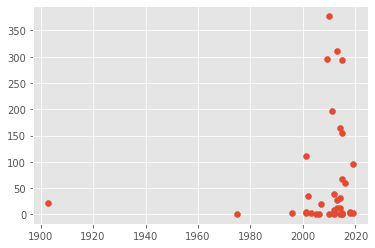

In [397]:
plt.scatter(x=dfall['date'], y=dfall['counts'])

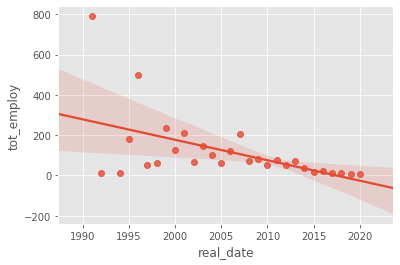

In [392]:
scatter_df = dfall[['date', 'tot_employ']]
scatter_df = scatter_df.loc[(scatter_df['date']>1990)]
scatter_df = scatter_df.sort_values('date')
df_grp = scatter_df.groupby('date')
key_list = df_grp.groups.keys()
df_med = pd.DataFrame(df_grp.median())
df_med['real_date'] = key_list

#med_list = df_grp.median()
#df_med = pd.DataFrame(scatter_df.groupby(['real_date'])['tot_employ'].median())
#df_med['date'] = range(1991,2020)
sns.regplot(df_med['real_date'], df_med['tot_employ'], order=1)

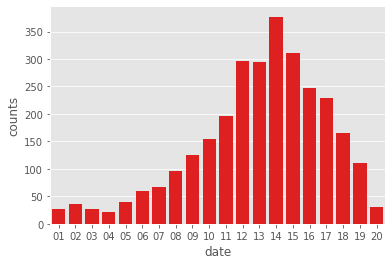

In [464]:
scatter_df = scatter_df.loc[(scatter_df['date']>2000)]
df_counts = scatter_df['date'].value_counts().rename_axis('date').reset_index(name='counts')
#df_counts['date'].astype(int)
df_counts['date'] = df_counts['date'].astype(str)
df_counts['date'] = df_counts['date'].apply(lambda x: x.split('.')[0][2:])
pp = sns.barplot(df_counts['date'], df_counts['counts'], ci=None, color='red')

#for ind, label in enumerate(pp.get_xticklabels()):
   
#    if ind % 10 == 0:  # every 10th label is kept
#        label.set_visible(True)
#    else:
#        label.set_visible(False)
pp        
#df_counts = pd.DataFrame(scatter_df['date'].value_counts())
#= scatter_df.sort_values('date')


In [ ]:
scatter_df = dfall[['date', 'job_t0']]
scatter_df = scatter_df.loc[(scatter_df['date']>2000)]
scatter_df = scatter_df.sort_values('date')
df_grp = scatter_df.groupby('date')
key_list = df_grp.groups.keys()
df_med = pd.DataFrame(df_grp.median())
df_med['real_date'] = key_list

#med_list = df_grp.median()
#df_med = pd.DataFrame(scatter_df.groupby(['real_date'])['tot_employ'].median())
#df_med['date'] = range(1991,2020)
sns.regplot(df_med['real_date'], df_med['tot_employ'], order=1)

In [467]:
scatter_df = dfall[['date', 'job_t0']]
scatter_df = scatter_df.loc[(scatter_df['date']>2000)]
scatter_df = scatter_df.sort_values('date')

job_df = scatter_df.groupby(['date', 'job_t0']).size().unstack(fill_value=0)

In [470]:
job_df.idxmax(axis = 1)

date
2001                     Agency
2002                     Agency
2003                     AdTech
2004                  eCommerce
2005                     AdTech
2006                     AdTech
2007                     AdTech
2008                     AdTech
2009                     AdTech
2010                     AdTech
2011                     AdTech
2012                   Software
2013                     AdTech
2014                    Fintech
2015                  eCommerce
2016                    Fintech
2017    Artificial Intelligence
2018                 Healthtech
2019    Artificial Intelligence
2020    Artificial Intelligence
dtype: object

In [471]:
scatter_df = dfall[['date', 'job_t1']]
scatter_df = scatter_df.loc[(scatter_df['date']>2000)]
scatter_df = scatter_df.sort_values('date')

job_df1 = scatter_df.groupby(['date', 'job_t1']).size().unstack(fill_value=0)
job_df1.idxmax(axis = 1)

date
2001                  Software
2002                  Software
2003                    Agency
2004    Information Technology
2005        Internet of Things
2006             Digital Media
2007            Marketing Tech
2008                  Software
2009            Marketing Tech
2010                  Software
2011                    Mobile
2012    Information Technology
2013                  Software
2014                  Software
2015                  Software
2016                   Fintech
2017                   Fintech
2018                  Software
2019    Information Technology
2020                Healthtech
dtype: object

In [474]:
scatter_df = dfall[['jobs', 'job_t0']]
#scatter_df = scatter_df.loc[(scatter_df['date']>2000)]
scatter_df = scatter_df.sort_values('jobs', ascending=True)

job_df = scatter_df.groupby(['jobs', 'job_t0']).size().unstack(fill_value=0)

In [476]:
job_df.idxmax(axis = 1)

jobs
1                  Healthtech
2                      Agency
3                    Software
4     Artificial Intelligence
5                      AdTech
6                     Fintech
7                    Big Data
8                       Cloud
9                     Fintech
10                    Fintech
11              Digital Media
12    Artificial Intelligence
13                    Fintech
14                    Fintech
15                   Big Data
16    Artificial Intelligence
17                  eCommerce
18                   Big Data
19                     AdTech
20    Artificial Intelligence
22     Information Technology
23                 Healthtech
26                   Big Data
28               Consumer Web
30               Consumer Web
34                     Edtech
36               Consumer Web
38                    Fitness
42                      Cloud
49                   Security
54                   Software
59                    Fintech
73                   Big Data
dtype

In [486]:
from matplotlib import pyplot
import seaborn

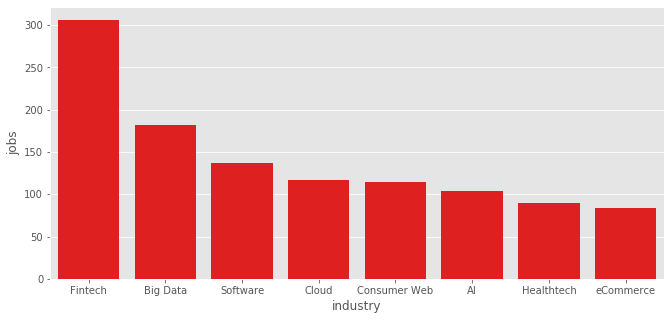

In [28]:
job_df = dfall[['jobs', 'job_t0']]
j_grp_df = job_df.groupby('job_t0')
key_list = j_grp_df.groups.keys()
j_sum_df = pd.DataFrame(j_grp_df.sum())
j_sum_df['industry'] = key_list
j_sum_df = j_sum_df.sort_values('jobs', ascending=False)
j_sum_df.replace(["Artificial Intelligence"],["AI"], inplace=True)
j_sub_df = j_sum_df.head(8)

a4_dims = (11, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
pp = sns.barplot(j_sub_df['industry'], j_sub_df['jobs'], ci=None, color='red')

#med_list = df_grp.median()
#df_med = pd.DataFrame(scatter_df.groupby(['real_date'])['tot_employ'].median())
#df_med['date'] = range(1991,2020)
#sns.regplot(df_med['real_date'], df_med['tot_employ'], order=1)

In [31]:
j_sum_df.head(20)

,jobs,industry
job_t0,,
Fintech,306.0,Fintech
Big Data,182.0,Big Data
Software,137.0,Software
Cloud,117.0,Cloud
Consumer Web,115.0,Consumer Web
Artificial Intelligence,104.0,AI
Healthtech,90.0,Healthtech
eCommerce,84.0,eCommerce
AdTech,75.0,AdTech


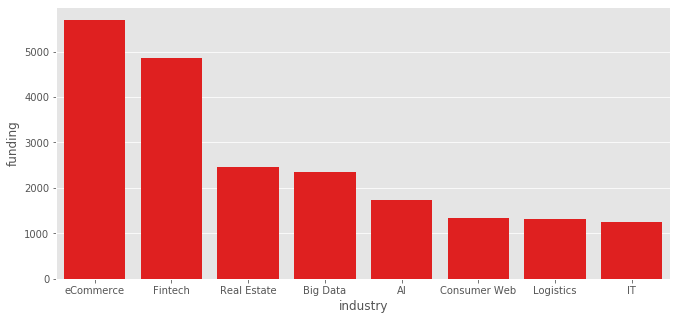

In [27]:
job_df = dfall[['funding', 'job_t0']]
j_grp_df = job_df.groupby('job_t0')
key_list = j_grp_df.groups.keys()
j_sum_df = pd.DataFrame(j_grp_df.sum())
j_sum_df['industry'] = key_list
j_sum_df = j_sum_df.sort_values('funding', ascending=False)
j_sum_df.replace(["Artificial Intelligence","Information Technology"],["AI", "IT"], inplace=True)
j_sub_df = j_sum_df.head(8)

a4_dims = (11, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
pp = sns.barplot(j_sub_df['industry'], j_sub_df['funding'], ci=None, color='red')

In [ ]:
j_sub_df

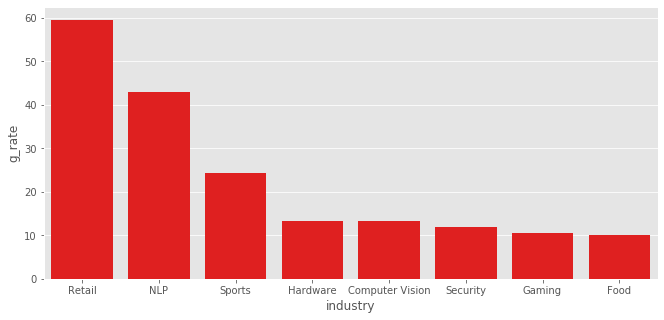

In [33]:
job_df = dfall[['g_rate', 'job_t0']]
j_grp_df = job_df.groupby('job_t0')
key_list = j_grp_df.groups.keys()
j_sum_df = pd.DataFrame(j_grp_df.median())
j_sum_df['industry'] = key_list
j_sum_df = j_sum_df.sort_values('g_rate', ascending=False)
j_sum_df.replace(["Artificial Intelligence","Information Technology",
                 "Natural Language Processing"],["AI", "IT", "NLP"], inplace=True)
j_sub_df = j_sum_df.head(8)

a4_dims = (11, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
pp = sns.barplot(j_sub_df['industry'], j_sub_df['g_rate'], ci=None, color='red')

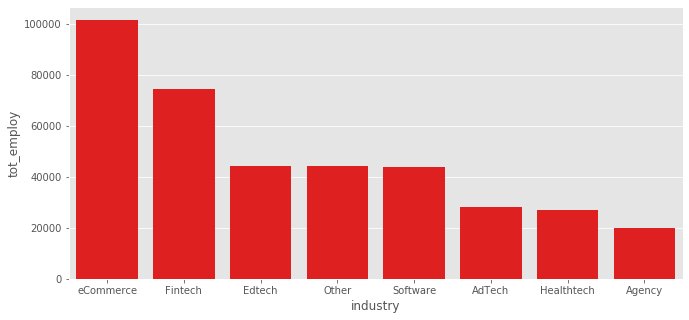

In [36]:
job_df = dfall[['tot_employ', 'job_t0']]
j_grp_df = job_df.groupby('job_t0')
key_list = j_grp_df.groups.keys()
j_sum_df = pd.DataFrame(j_grp_df.sum())
j_sum_df['industry'] = key_list
j_sum_df = j_sum_df.sort_values('tot_employ', ascending=False)
j_sum_df.replace(["Artificial Intelligence","Information Technology",
                 "Natural Language Processing"],["AI", "IT", "NLP"], inplace=True)
j_sub_df = j_sum_df.head(8)

a4_dims = (11, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
pp = sns.barplot(j_sub_df['industry'], j_sub_df['tot_employ'], ci=None, color='red')

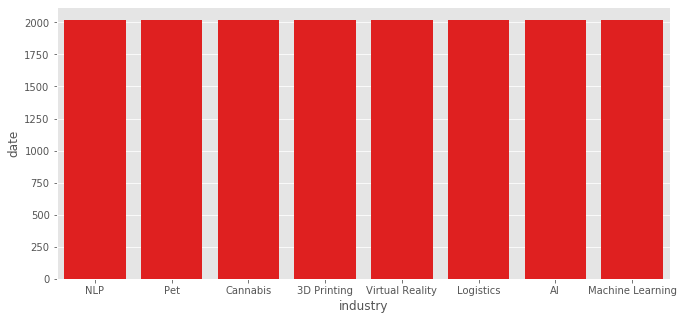

In [37]:
d_job_df = dfall[['date','job_t0']]
d_grp_df = d_job_df.groupby('job_t0')
key_list = d_grp_df.groups.keys()
d_sum_df = pd.DataFrame(d_grp_df.median())
d_sum_df['industry'] = key_list

j_job_df = dfall[['date','job_t0']]
d_grp_df = d_job_df.groupby('job_t0')
key_list = d_grp_df.groups.keys()
d_sum_df = pd.DataFrame(d_grp_df.median())
d_sum_df['industry'] = key_list

job_df = dfall[['tot_employ','job_t0']]
j_grp_df = job_df.groupby('job_t0')
key_list = j_grp_df.groups.keys()
j_sum_df = pd.DataFrame(j_grp_df.median())
j_sum_df['industry'] = key_list

j_sum_df = j_sum_df.sort_values('date', ascending=False)
j_sum_df.replace(["Artificial Intelligence","Information Technology",
                 "Natural Language Processing"],["AI", "IT", "NLP"], inplace=True)
j_sub_df = j_sum_df.head(8)

a4_dims = (11, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
pp = sns.barplot(j_sub_df['industry'], j_sub_df['date'], ci=None, color='red')

In [50]:
d_job_df = dfall[['date','job_t0']]
d_grp_df = d_job_df.groupby('job_t0')
key_list = d_grp_df.groups.keys()
d_sum_df = pd.DataFrame(d_grp_df.median())
d_sum_df['industry'] = key_list

job_df = dfall[['tot_employ','job_t0']]
j_grp_df = job_df.groupby('job_t0')
key_list = j_grp_df.groups.keys()
j_sum_df = pd.DataFrame(j_grp_df.median())
j_sum_df['industry'] = key_list

In [69]:
rate = pd.merge(d_sum_df, j_sum_df, on = 'industry')

In [70]:
rate['g_rate']= rate['tot_employ']/(2021-rate['date'])

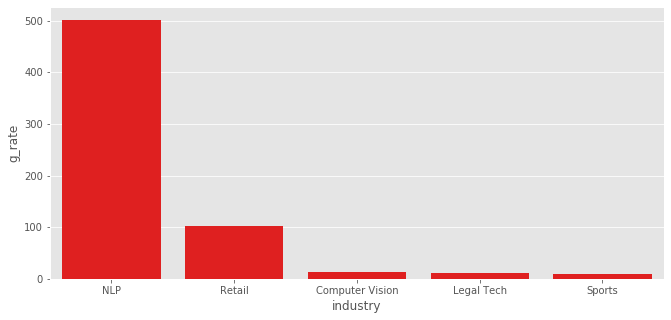

In [73]:
rate = rate.sort_values('g_rate', ascending=False)
rate.replace(["Artificial Intelligence","Information Technology",
                 "Natural Language Processing"],["AI", "IT", "NLP"], inplace=True)
rate = rate.head(5)

a4_dims = (11, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
pp = sns.barplot(rate['industry'], rate['g_rate'], ci=None, color='red')

In [71]:
rate = rate.sort_values('g_rate', ascending=False)
rate.replace(["Artificial Intelligence","Information Technology",
                 "Natural Language Processing"],["AI", "IT", "NLP"], inplace=True)
rate.head(20)

,date,industry,tot_employ,g_rate
38,2019.0,NLP,1002.5,501.250000
47,2015.0,Retail,615.0,102.500000
13,2012.0,Computer Vision,120.0,13.333333
32,2013.0,Legal Tech,93.5,11.687500
55,2008.0,Sports,128.5,9.884615
35,2012.0,Marketing Tech,80.0,8.888889
50,2013.5,Security,66.0,8.800000
7,2014.5,Beauty,55.0,8.461538
22,2015.0,Food,50.0,8.333333
44,2015.0,Productivity,50.0,8.333333


In [48]:
key_list

dict_keys(['3D Printing', 'AdTech', 'Aerospace', 'Agency', 'Angel or VC Firm', 'Artificial Intelligence', 'Automotive', 'Beauty', 'Big Data', 'Blockchain', 'Cannabis', 'Cloud', 'Co-Working Space or Incubator', 'Computer Vision', 'Consumer Web', 'Digital Media', 'Edtech', 'Enterprise Web', 'Events', 'Fashion', 'Fintech', 'Fitness', 'Food', 'Gaming', 'Greentech', 'HR Tech', 'Hardware', 'Healthtech', 'Information Technology', 'Insurance', 'Internet of Things', 'Kids', 'Legal Tech', 'Logistics', 'Machine Learning', 'Marketing Tech', 'Mobile', 'Music', 'Natural Language Processing', 'News', 'On-Demand', 'Other', 'Payments', 'Pet', 'Productivity', 'Professional Services', 'Real Estate', 'Retail', 'Robotics', 'Sales', 'Security', 'Sharing Economy', 'Social Impact', 'Social Media', 'Software', 'Sports', 'Transportation', 'Travel', 'Virtual Reality', 'Wearables', 'eCommerce'])

In [38]:
j_sum_df.head(20)

,date,industry
job_t0,,
Natural Language Processing,2019.0,NLP
Pet,2018.0,Pet
Cannabis,2018.0,Cannabis
3D Printing,2016.0,3D Printing
Virtual Reality,2016.0,Virtual Reality
Logistics,2016.0,Logistics
Artificial Intelligence,2016.0,AI
Machine Learning,2016.0,Machine Learning
Blockchain,2016.0,Blockchain


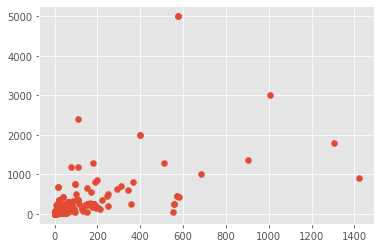

In [497]:
plt.scatter(x=dfall['funding'], y=dfall['tot_employ'])

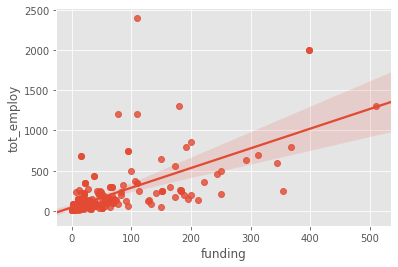

In [499]:
scatter_df = dfall[['funding','tot_employ']]
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
#scatter_df.plot.scatter(x='funding', y='tot_employ')
sns.regplot(scatter_df['funding'], scatter_df['tot_employ'], order=1)

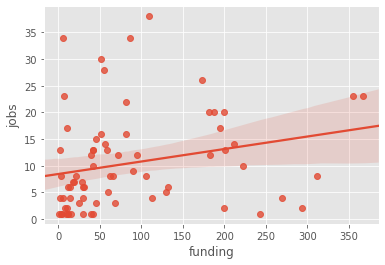

In [500]:
scatter_df = dfall[['funding','jobs']]
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
#scatter_df.plot.scatter(x='funding', y='tot_employ')
sns.regplot(scatter_df['funding'], scatter_df['jobs'], order=1)

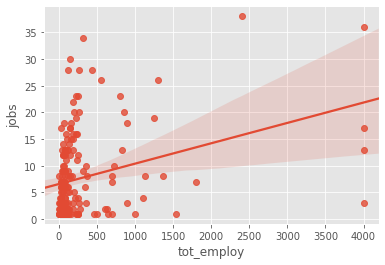

In [501]:
scatter_df = dfall[['tot_employ','jobs']]
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
#scatter_df.plot.scatter(x='funding', y='tot_employ')
sns.regplot(scatter_df['tot_employ'], scatter_df['jobs'], order=1)

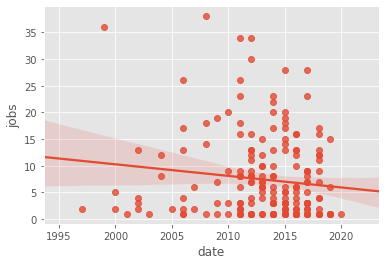

In [502]:
scatter_df = dfall[['date','jobs']]
scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
#scatter_df.plot.scatter(x='funding', y='tot_employ')
sns.regplot(scatter_df['date'], scatter_df['jobs'], order=1)

df_med

In [510]:
scatter_df = dfall[['g_rate','jobs']]

In [511]:
scatter_df.describe()

,g_rate,jobs
count,1591,239
mean,31,9
std,233,11
min,0,1
25%,2,1
50%,5,4
75%,13,12
max,5000,73


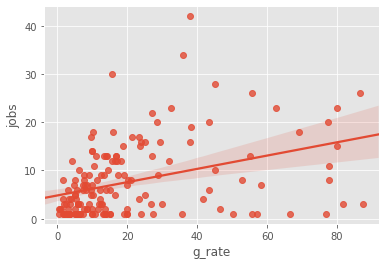

In [514]:
scatter_df = dfall[['g_rate','jobs']]
scatter_df = scatter_df.loc[(scatter_df['g_rate']<100) & (scatter_df['jobs']<50) ]
#scatter_df = scatter_df.loc[scatter_df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
#scatter_df.plot.scatter(x='funding', y='tot_employ')
sns.regplot(scatter_df['g_rate'], scatter_df['jobs'], order=1)

In [298]:
df_max = pd.DataFrame(scatter_df.groupby(['date'])['tot_employ'].max())

In [309]:
df_max['date'] = range(1996,2021)

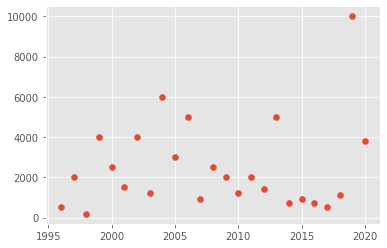

In [312]:
plt.scatter(x=df_max['date'], y=df_max['tot_employ'])

In [315]:
df_med = pd.DataFrame(scatter_df.groupby(['date'])['tot_employ'].median())

In [326]:
df_med

,tot_employ
date,
1991.0,790.0
1992.0,14.0
1994.0,12.0
1995.0,180.0
1996.0,500.0
1997.0,50.0
1998.0,60.0
1999.0,234.0
2000.0,125.0


In [316]:
df_med['date'] = range(1996,2021)

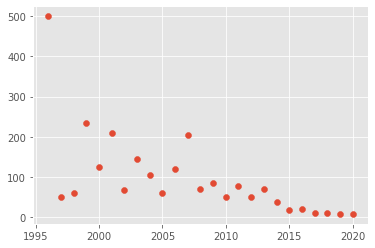

In [317]:
plt.scatter(x=df_med['date'], y=df_med['tot_employ'])

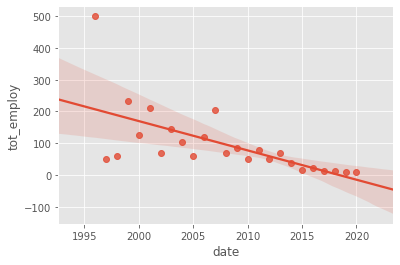

In [320]:
sns.regplot(df_med['date'], df_med['tot_employ'], order=1)

In [292]:
df_stats[['tot_employ']].get_group(2014.0)

,tot_employ
3167,NaN
3203,NaN
3277,NaN
3166,NaN
4379,NaN
...,...
3681,NaN
619,70.0
4948,12.0
2085,46.0


In [ ]:
df_stats.agg({'tot_employ':'mean'})

In [246]:
df_stats = scatter_df.groupby('date').agg(['mean', 'max', 'median'])

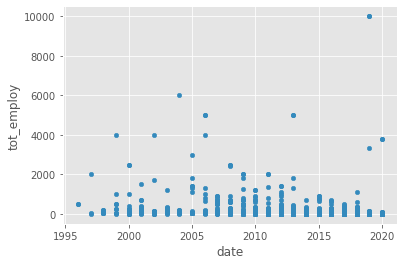

In [243]:
scatter_df.plot.scatter(x='date', y='tot_employ')

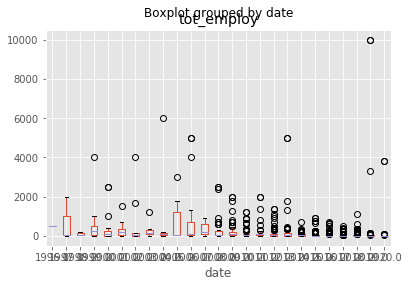

In [244]:
scatter_df.boxplot(by='date', column = 'tot_employ')

In [230]:
import seaborn as sns

In [251]:
df_stats.head()

tot_employ               
              mean     max median
date                             
1996.0  500.000000   500.0  500.0
1997.0  690.333333  2000.0   50.0
1998.0   93.125000   180.0   60.0
1999.0  732.111111  4000.0  234.0
2000.0  401.900000  2500.0  125.0

In [257]:
df_stats.reset_index()

date  tot_employ                
                  mean      max median
0   1996.0  500.000000    500.0  500.0
1   1997.0  690.333333   2000.0   50.0
2   1998.0   93.125000    180.0   60.0
3   1999.0  732.111111   4000.0  234.0
4   2000.0  401.900000   2500.0  125.0
5   2001.0  292.250000   1534.0  210.0
6   2002.0  436.800000   4000.0   68.0
7   2003.0  225.125000   1200.0  145.0
8   2004.0  521.500000   6000.0  104.0
9   2005.0  564.210526   3000.0   60.0
10  2006.0  796.500000   5000.0  120.0
11  2007.0  348.833333    900.0  203.5
12  2008.0  328.577778   2500.0   70.0
13  2009.0  280.508475   2000.0   84.0
14  2010.0  170.881356   1200.0   50.0
15  2011.0  166.164557   2000.0   78.0
16  2012.0  132.438462   1400.0   50.0
17  2013.0  241.356322   5000.0   70.0
18  2014.0   67.065789    723.0   37.0
19  2015.0   59.846995    900.0   17.0
20  2016.0   57.141026    700.0   20.5
21  2017.0   35.825581    500.0   11.5
22  2018.0   56.384615   1100.0   11.0
23  2019.0  278.144444  10000.0    8.0
24  2020.0  325.240000   3803.0    9.0

In [258]:
df_stats['date']

KeyError: 'date'

In [250]:
sns.regplot(df_stats['date'], df_stats['mean'], order=2)

KeyError: 'date'

In [223]:
z = np.polyfit(x=scatter_df['date'], y=scatter_df['tot_employ'], deg=2)
p = np.poly1d(z)
scatter_df['trendline'] = p(scatter_df['date'])

In [218]:
scatter_df

,date,tot_employ,trendline
3527,1980.0,93.0,491.709393
4978,1980.0,93.0,491.709393
2877,1982.0,520.0,496.577824
278,1982.0,520.0,496.577824
789,1982.0,520.0,496.577824
...,...,...,...
197,2020.0,20.0,-24.768348
4192,2020.0,7.0,-24.768348
920,2020.0,5.0,-24.768348
3938,2020.0,60.0,-24.768348


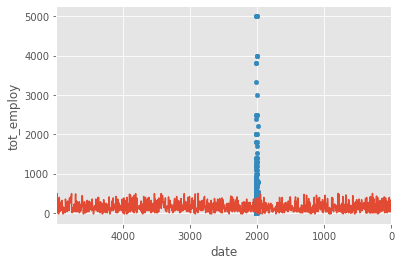

In [224]:
ax = scatter_df.plot.scatter(x='date', y='tot_employ')
#scatter_df.set_index('date', inplace=True)
scatter_df.trendline.sort_index().plot(ax=ax)
plt.gca().invert_xaxis()